# The Sparks Foundation - GRIP - Data Science & Business Analytics - JAN'2022

#### TASK 1 : Prediction using supervised ML

#### Author : ABHISHEK KUMAR

#### Dataset Link:http://bit.ly/w-data


Problem Statement(s) :

* Import the Libraries & Dataset.

* Data Visualization.

* Segregate the dataset into test and train.

* Predict the percentage of a student based on the no. of study hours.

* What will be predicted score if a student studies for 9.25 hrs/ day?


### Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("http://bit.ly/w-data")
df.shape # to view size of DataFrame i.e. number of rows, columns

(25, 2)

In [3]:
# check top 5 rows 
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# To find the datatypes and missing values if any
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Observation: There is no missing values or null values in the dataset

In [5]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


Observation:

* The total count of Hours & Score is 25.

* The mean of Hours column is 5.012 where as for Scores is 51.48.

* It shows that the min hours spent by a student is 1.1 whereas the max is hours is 9.2.

* It shows that the min marks scored by a student is 17 whereas the max marks scored is 95.

In [6]:
# To check if the hour column contains any unique values.
df.Hours.value_counts()

2.5    2
2.7    2
4.5    1
6.9    1
3.8    1
4.8    1
7.4    1
6.1    1
1.9    1
8.9    1
1.1    1
3.3    1
5.9    1
5.1    1
7.7    1
8.3    1
5.5    1
9.2    1
1.5    1
3.5    1
8.5    1
3.2    1
7.8    1
Name: Hours, dtype: int64

In [7]:
#Percentage of the unique values
df.Hours.value_counts(normalize=True)*100

2.5    8.0
2.7    8.0
4.5    4.0
6.9    4.0
3.8    4.0
4.8    4.0
7.4    4.0
6.1    4.0
1.9    4.0
8.9    4.0
1.1    4.0
3.3    4.0
5.9    4.0
5.1    4.0
7.7    4.0
8.3    4.0
5.5    4.0
9.2    4.0
1.5    4.0
3.5    4.0
8.5    4.0
3.2    4.0
7.8    4.0
Name: Hours, dtype: float64

In [8]:
# To check if the score column contains any unique values.
df.Scores.value_counts()

30    3
21    1
41    1
76    1
35    1
54    1
69    1
67    1
24    1
95    1
17    1
42    1
62    1
47    1
85    1
25    1
81    1
60    1
88    1
20    1
75    1
27    1
86    1
Name: Scores, dtype: int64

In [9]:
#Percentage of the unique values
df.Scores.value_counts(normalize=True)*100

30    12.0
21     4.0
41     4.0
76     4.0
35     4.0
54     4.0
69     4.0
67     4.0
24     4.0
95     4.0
17     4.0
42     4.0
62     4.0
47     4.0
85     4.0
25     4.0
81     4.0
60     4.0
88     4.0
20     4.0
75     4.0
27     4.0
86     4.0
Name: Scores, dtype: float64

### Visualization

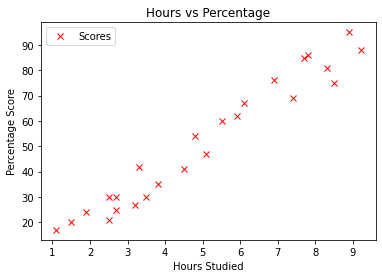

In [10]:
# Scatter plot to see the distribution of data
df.plot(x='Hours', y='Scores', style='x', color = 'r')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


Observation: From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [11]:
#segregate X
x = df.iloc[:, :-1].values  
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
#segregate y
y = df.iloc[:, 1].values 
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

### Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Training the Algorithm
As the dataset is split into training and testing sets, now I am going to train the algorithm.

In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression()

In [15]:
regressor

LinearRegression()

In [16]:
#Intercept (c)
regressor.intercept_

2.018160041434683

In [17]:
#Slope (m)
regressor.coef_
#coef - coefficient

array([9.91065648])

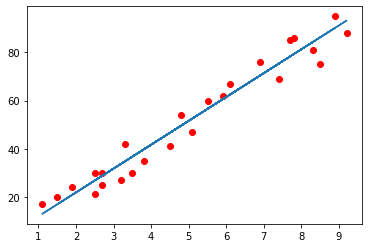

In [18]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y,color='red')
plt.plot(x, line);
plt.show()

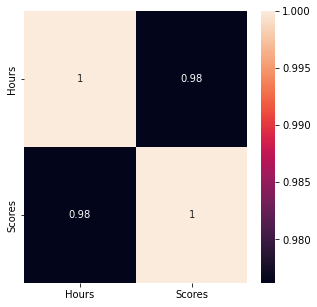

In [19]:
#correlation plot
plt.figure(figsize=(5,5))
correlation_matrix = df.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

### Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [20]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [22]:
print('Train accuracy: ', regressor.score(x_train, y_train),'\nTest accuracy : ', regressor.score(x_test, y_test) )

Train accuracy:  0.9515510725211552 
Test accuracy :  0.9454906892105356


### Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [23]:
# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# To find Mean Absolute Error(mse)
mse = (mean_absolute_error(y_test, y_pred))
print("MAE:",mse)

# To find Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE:",rmse)

# To find coefficient of determination
r2 =  r2_score(y_test, y_pred)
print("R-Square:",r2)


MAE: 4.183859899002975
RMSE: 4.6474476121003665
R-Square: 0.9454906892105356


In [24]:
# Predict percent for custom input value for hours
# What will be predicted score if a student studies for 9.25 hrs/ day? 

hours = np.array([9.25]) # No. of hours should be mentioned inside array
hours = hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(float(hours)))
print("Predicted Score = {}".format(round(own_pred[0],2)))

No of Hours = 9.25
Predicted Score = 93.69
